In [1]:
import lmdb
import glob

In [6]:
db = lmdb.open('./temp.db', map_size=1099511627776)

In [7]:
txn = db.begin(write=True)

In [2]:
import cv2

In [54]:
img = cv2.imread('/root/End2End/data/extra/Town01_short/routes_town01_short_10_04_10_26_47/seg_front/0001.png', cv2.IMREAD_GRAYSCALE)

In [58]:
_, img_byte = cv2.imencode('.png', img)

In [29]:
txn.put('img'.encode(), img_byte)

True

In [30]:
txn.commit()

In [27]:
txn = db.begin()

In [3]:
import numpy as np

In [28]:
img = cv2.imdecode(np.frombuffer(txn.get('img'.encode()), dtype=np.int8), cv2.IMREAD_COLOR)

In [34]:
np.resize() img.resize(300, 400)

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [43]:
glob.glob('{}/**'.format('/root/End2End/data/extra/Town01_short'))

['/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_53_48',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_04_10_26_47',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_40_58',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_02_01_03',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_04_02_33_35',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_07_18_51',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_14_04_37',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_02_33_54',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_09_08_49',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_04_15_13_05',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_04_08_30_22',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_04_02_06_51',

In [18]:

import json
import numpy as np

name = 'Town01_short'
dataset_path = '/root/End2End/data/extra'
dataset_dst_path = '/root/mnt/DATASET/CARLA/db_extra'

rgb_item = ['rgb_tel', 'rgb_front', 'rgb_left', 'rgb_right']
seg_item = ['seg_tel', 'seg_front', 'seg_left', 'seg_right']
# ['measurements', 'lidar']
routes = os.listdir(os.path.join(dataset_path, name))
for route in routes:
      if route[-5] != '.json':
            route_path = os.path.join(dataset_path, name, route)
            dst_path = os.path.join(dataset_dst_path, name, route)
            os.mkdir(dst_path)
            db = lmdb.open(route_path, map_size=1099511627776)
            txn = db.begin(write=True)

            for item in rgb_item:
                  p = os.path.join(route_path, item)
                  files = os.listdir(p)
                  for file in files:
                        _p = os.path.join(p, file)
                        img = cv2.imread(_p, cv2.IMREAD_COLOR)
                        _, img_byte = cv2.imencode('.png', img)
                        txn.put('{}_{}'.format(item, file[0:4]).encode(), img_byte)
                        pass
            
            for item in seg_item:
                  p = os.path.join(route_path, item)
                  files = os.listdir(p)
                  for file in files:
                        _p = os.path.join(p, file)
                        img = cv2.imread(_p, cv2.IMREAD_GRAYSCALE)
                        _, img_byte = cv2.imencode('.png', img)
                        txn.put('{}_{}'.format(item, file[0:4]).encode(), img_byte)
                        pass
            
            p = os.path.join(route_path, 'measurements')
            files = os.listdir(p)
            for file in files:
                  _p = os.path.join(p, file)
                  
                  with open(_p) as f:
                        txn.put('measurements_{}'.format(file[0:4]).encode(),  f.read().encode())
            
            p = os.path.join(route_path, 'lidar')
            files = os.listdir(p)
            for file in files:
                  _p = os.path.join(p, file)
                  
                  lidar = np.load(_p)
                  txn.put('lidar_{}'.format(file[0:4]).encode(), lidar)
            txn.commit()
            db.close()

TypeError: a bytes-like object is required, not 'float'

In [44]:
glob.glob('{}/**'.format('/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18'))

['/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/semantic_lidar',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/seg_tel',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/affordances',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/topdown',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/rgb_left',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/rgb_tel',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/depth_left',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/seg_front',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/rgb_rear',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/lidar',
 '/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18/measurements',
 '/root/End2End/data/extra/Town01_short/rout

In [4]:
import os

In [46]:
os.listdir('/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_03_33_18')

['semantic_lidar',
 'seg_tel',
 'affordances',
 'topdown',
 'rgb_left',
 'rgb_tel',
 'depth_left',
 'seg_front',
 'rgb_rear',
 'lidar',
 'measurements',
 'seg_rear',
 'depth_front',
 '2d_bbs_front',
 '2d_bbs_rear',
 'depth_right',
 'rgb_right',
 'seg_left',
 '2d_bbs_right',
 'seg_right',
 '3d_bbs',
 '2d_bbs_left',
 'depth_rear',
 '2d_bbs_tel',
 'depth_tel',
 'rgb_front']

In [53]:
img.shape

(300, 400)

In [59]:
img_byte

array([137,  80,  78, ...,  66,  96, 130], dtype=uint8)

In [5]:
import json

In [18]:
with open('/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_09_45_55/measurements/0000.json') as f:
      
      txn.put('json'.encode(), f.read().encode())


In [19]:
txn.commit()

In [67]:
for k, v in js.items():
      print(k)

x
y
theta
speed
target_speed
x_command
y_command
command
steer
throttle
brake
weather
weather_id
near_node_x
near_node_y
far_node_x
far_node_y
is_vehicle_present
is_pedestrian_present
is_red_light_present
is_stop_sign_present
should_slow
should_brake
angle
angle_unnorm
angle_far_unnorm


In [6]:
lidar = np.load('/root/End2End/data/extra/Town01_short/routes_town01_short_10_05_09_45_55/lidar/0000.npy')

In [20]:
txn = db.begin(write=True)

In [8]:
txn.put('lidar'.encode(), lidar)

True

In [20]:
import numpy as np
txn.put('json'.encode(), js.)

TypeError: a bytes-like object is required, not 'dict'

In [21]:
json.loads(txn.get('json'.encode()))

{'x': -12.543014911448877,
 'y': 396.3767400422073,
 'theta': 0.0011960399569943547,
 'speed': 0.0,
 'target_speed': 4.0,
 'x_command': 1.9960285957994108,
 'y_command': 354.5910649364261,
 'command': 4,
 'steer': -0.017,
 'throttle': 0.75,
 'brake': False,
 'weather': {'cloudiness': 30.0,
  'precipitation': 0.0,
  'precipitation_deposits': 0.0,
  'wind_intensity': 0.0,
  'sun_azimuth_angle': 0.0,
  'sun_altitude_angle': 70.0,
  'fog_density': 0.0,
  'fog_distance': 0.0,
  'wetness': 0.0,
  'fog_falloff': 0.0},
 'weather_id': None,
 'near_node_x': -7.609055667600386,
 'near_node_y': 396.298645559679,
 'far_node_x': 1.9960285957994108,
 'far_node_y': 354.5910649364261,
 'is_vehicle_present': 0,
 'is_pedestrian_present': 0,
 'is_red_light_present': 0,
 'is_stop_sign_present': 0,
 'should_slow': 1,
 'should_brake': 0,
 'angle': -0.010836970157323418,
 'angle_unnorm': -0.9753273141591076,
 'angle_far_unnorm': -70.88353189908553}

In [16]:
np.frombuffer(txn.get('float'.encode()), dtype=np.float32)

array([1.], dtype=float32)

In [93]:
lidar

array([[ 4.1649998e+01,  5.5799806e-01,  7.3446727e+00,  8.4435248e-01],
       [ 3.5941014e+00,  3.4491619e+01,  6.1147337e+00,  8.6861664e-01],
       [ 3.1237500e+00,  3.4449120e+01,  6.0992308e+00,  8.6892688e-01],
       ...,
       [-4.9925389e+00,  2.0076172e-01, -2.8847418e+00,  9.7718614e-01],
       [-4.9960938e+00,  6.6934817e-02, -2.8847418e+00,  9.7718626e-01],
       [-4.9964452e+00,  3.3468015e-02, -2.8847418e+00,  9.7718620e-01]],
      dtype=float32)

In [22]:
'Town01_tiny'[0:6]

'Town01'

In [26]:
list(zip([0 for j in range(12)], range(12)))

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11)]

In [35]:
for i in range(100):
      continue
print(i)

99


In [2]:
import lmdb, numpy as np, cv2

In [15]:
db = lmdb.open('/root/mnt/DATASET/CARLA/db_extra/Town01_short/routes_town01_short_10_04_08_30_22')

In [16]:
txn = db.begin(write=False)

In [17]:
data = txn.get('rgb_front_0002'.encode())

In [20]:
img = cv2.imdecode(np.frombuffer(data, dtype=np.int8), cv2.IMREAD_COLOR)

In [24]:
import matplotlib.pyplot as plt

In [25]:
plt.draw(img)

TypeError: draw() takes 0 positional arguments but 1 was given

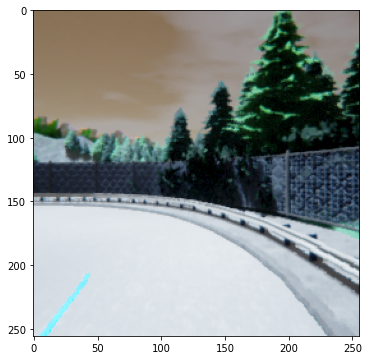

In [44]:
plt.rcParams['figure.figsize'] = (16.0, 6.0) 
# f, axarr = plt.subplots(1, 1)
# axarr[0].imshow(lefts[0,0,:,:,:].detach().cpu().permute(1, 2, 0).int(), cmap='Greys_r')
plt.imshow(cropped_image, cmap='Greys_r')
# axarr[2].imshow(rights[0,0,:,:,:].detach().cpu().permute(1, 2, 0).int(), cmap='Greys_r')
plt.show()

In [40]:
image = img
crop = 256

height, width  = image.shape[0:2]
start_x = height//2 - crop//2
start_y = width//2 - crop//2
cropped_image = image[start_x:start_x+crop, start_y:start_y+crop]
# if len(image.shape) == 3:
#       cropped_image = np.transpose(cropped_image, (2,0,1))

In [41]:
cropped_image.shape

(256, 256, 3)

(256, 256, 3)